<a href="https://colab.research.google.com/github/Rodrigoos/Rodrigoos.github.io/blob/main/genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib
from matplotlib import cm
import matplotlib.gridspec as gridspec
import seaborn as sns

import copy
from tqdm import tqdm

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
def ackley_func(x, y):
    return 20 + np.exp(1) - 20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y)))

In [18]:
def esfera_func(X):
    return sum(y ** 2 for y in X)

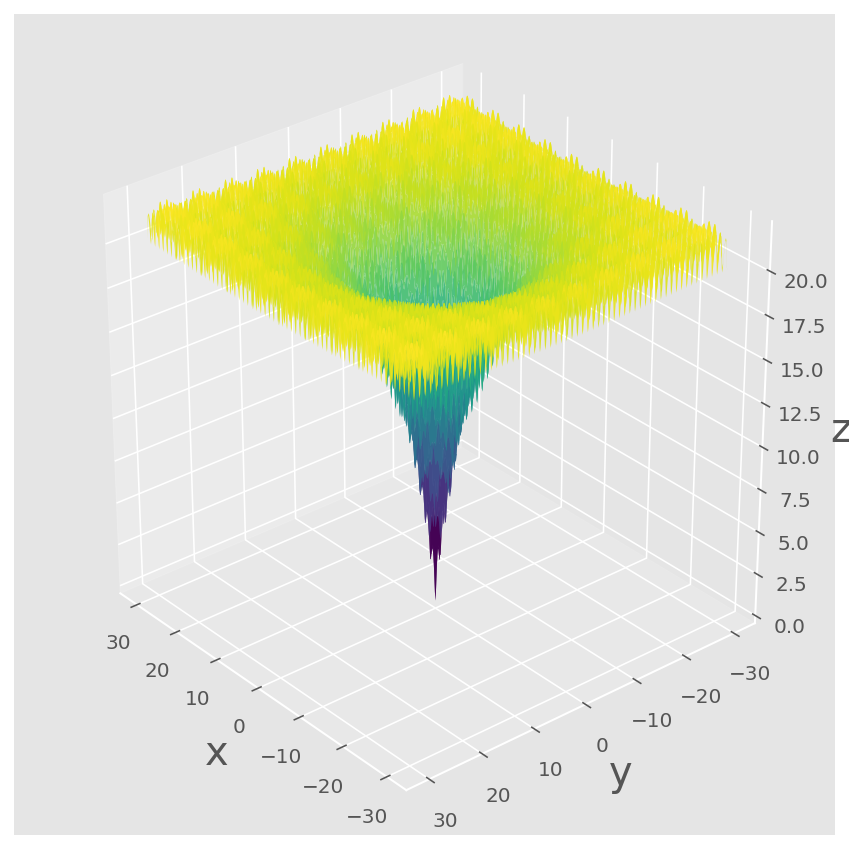

In [5]:
fig = plt.figure(figsize=(6,6))

X = np.arange(-30, 30, 0.1)
Y = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(X, Y)
Z = ackley_func(X, Y)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()

In [6]:
def ackley_func(x):
    part_1 = 20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2)))
    part_2 = np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[0])))
    return 20 + np.exp(1) - part_1 - part_2

In [7]:
class Individual:
    def __init__(self, search_space, chromosome_len):
        self.search_space = search_space
        self.chromosome_len = chromosome_len 
        self.chromosome = np.array([self.create_gene(j) for j in range(chromosome_len)])
        self.target_value = None
        self.fitness = None
        self.name = '#' + ''.join(map(str, np.random.randint(0,9, size=7).tolist()))
    
    def create_gene(self, pos):
        return np.random.uniform(self.search_space[pos][0], 
                                 self.search_space[pos][1])
    
    def __repr__(self):
        chromosome = '; '.join(list(map(str, a.fittest_indivdual.chromosome.tolist())))
        return f'{self.name}: chromosome = ({(chromosome)}); target_value = {self.target_value}'

In [8]:
class GeneticAlgorithm:
    def __init__(self, ell=1000, k=200, mutation_rate=0.1, max_iter=100):
        self.ell = ell
        self.k = k
        self.mutation_rate = mutation_rate
        self.max_iter = max_iter
        
        self.search_space = None 
        self.chromosome_len = None
        self.best_individuals = None 
        self.fittest_indivdual = None 
        self.population = None
        self.best_target_value_history = None
        
    def search_global(self, search_space, func):
        
        self.search_space = np.array(search_space)
        self.chromosome_len = len(self.search_space)
        self.best_target_value_history = []

       
        self.population = self.create_population(self.search_space)
        
        for i in tqdm(range(self.max_iter)):
            self.evaluate_population(func)
            self.selection()            
            self.best_target_value_history.append(self.fittest_indivdual.target_value)      
            
            for idx in range(self.k, self.ell):
                select_fitted_individual = np.random.choice(self.best_individuals)
                offspring = self.crossover(select_fitted_individual,
                                           self.population[idx])
                self.population[idx].chromosome = offspring
            
            for individual in self.population[1:]:
                self.mutate(individual)
        
        return self.fittest_indivdual
            
    def create_population(self, search_space):
      
        self.search_space = np.array(search_space)
        self.chromosome_len = len(self.search_space)

        return np.array([Individual(self.search_space,
                                    self.chromosome_len) for i in range(self.ell)])

    def evaluate_population(self, func):
      
        F = []
        
        for individual in self.population:
            individual.target_value = func(individual.chromosome)
            F.append(individual.target_value)

        for individual in self.population:
            individual.fitness = self.normalize(individual.target_value,
                                                min(F), max(F))

    def normalize(self, z, F_best, F_worst):
       
        return (z - F_worst) / (F_best - F_worst)

    def selection(self):
      
        self.population = sorted(self.population,
                                 key=lambda individual: individual.fitness, reverse=True)
        self.best_individuals = self.population[:self.k]
        self.fittest_indivdual = self.population[0]

    def crossover(self, parent_fitted, parent_random):
      
        return np.array([parent_random.chromosome[j]
                         if np.random.uniform(0, 1) < parent_random.fitness
                         else parent_fitted.chromosome[j]
                         for j in range(parent_fitted.chromosome_len)])

    def mutate(self, individual):
        individual_hat_chromosome = np.asarray([])
 
        for j in range(individual.chromosome_len):
            j_hat = individual.chromosome[j] + np.random.uniform(-self.mutation_rate, 
                                                                  self.mutation_rate)
            j_hat = min(max(j_hat, self.search_space[j][0]), self.search_space[j][1])
            individual_hat_chromosome = np.append(individual_hat_chromosome, j_hat)
      
        individual.chromosome = individual_hat_chromosome

In [9]:
np.random.seed
a = GeneticAlgorithm(k=20, ell=1200, mutation_rate=0.2, max_iter=250)
a.search_global(search_space=[(-10, 10), (-10, 10)], func=ackley_func)

100%|██████████| 250/250 [00:57<00:00,  4.32it/s]


#1688741: chromosome = (-0.00036630998081514654; -0.0001556394405062278); target_value = 0.0011328914954020775

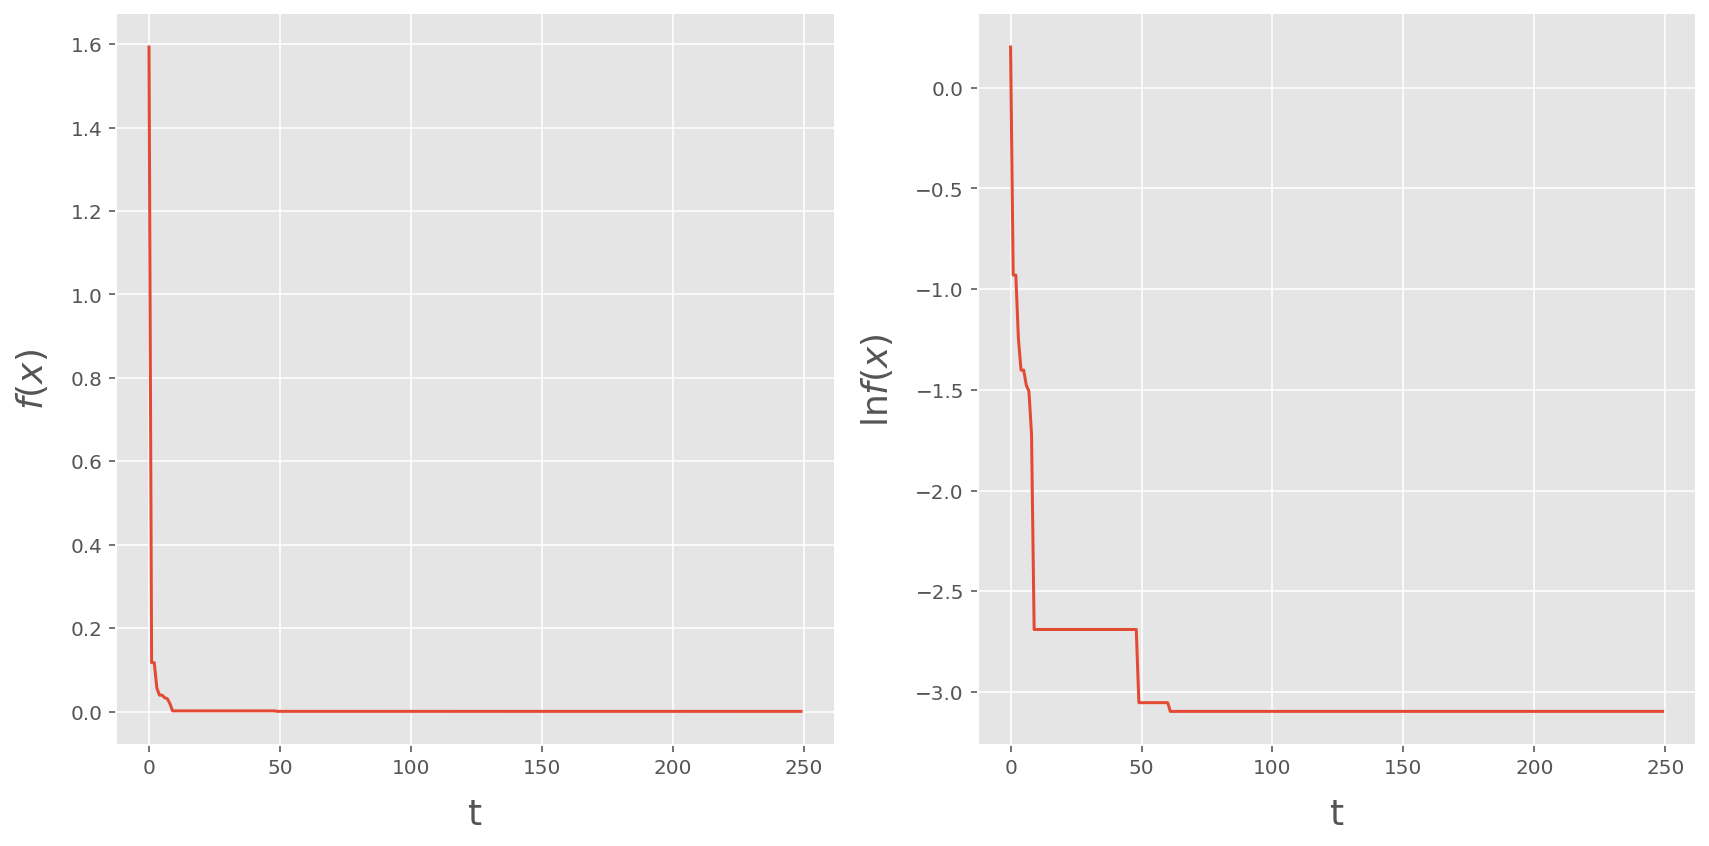

In [16]:
fig = plt.figure(figsize=(12, 6))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
ax_0.plot(a.best_target_value_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("t", fontsize=18, labelpad=10)
ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
ax_1.plot(np.log10(a.best_target_value_history))

fig.tight_layout()


In [ ]:

for i in range(10):
  np.random.seed()
  ackley = GeneticAlgorithm(k=20, ell=20, mutation_rate=0.2, max_iter=250)
  ackley.search_global(search_space=[(-10, 10), (-10, 10)], func=ackley_func)

  fig = plt.figure(figsize=(10,5))

  ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
  ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

  ax_0.spines["top"].set_visible(False)  
  ax_0.spines["right"].set_visible(False)
  ax_0.get_xaxis().tick_bottom()  
  ax_0.get_yaxis().tick_left() 
  ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
  ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
  ax_0.plot(ackley.best_target_value_history)

  ax_1.spines["top"].set_visible(False)  
  ax_1.spines["right"].set_visible(False)
  ax_1.get_xaxis().tick_bottom()  
  ax_1.get_yaxis().tick_left() 
  ax_1.set_xlabel("t", fontsize=18, labelpad=10)
  ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
  ax_1.plot(np.log10(ackley.best_target_value_history))

  fig.tight_layout()


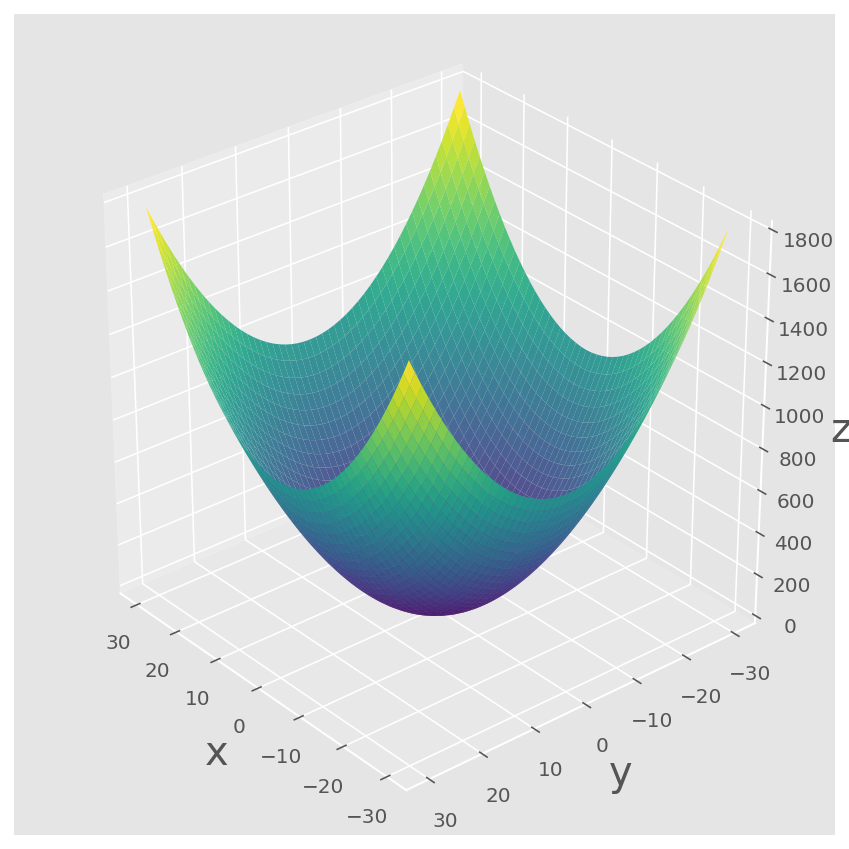

In [14]:
fig = plt.figure(figsize=(6,6))
# Make grid
X = np.arange(-30, 30, 0.1)
Y = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.array(X ** 2 + Y ** 2)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis', )
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

ax.view_init(30, 140)

plt.tight_layout()


In [ ]:
for i in range(10):
  np.random.seed
  esfera = GeneticAlgorithm(k=20, ell=1200, mutation_rate=0.2, max_iter=250)
  esfera.search_global(search_space=[(-10, 10), (-10, 10)], func=esfera_func)

  fig = plt.figure(figsize=(12, 6))

  ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
  ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

  ax_0.spines["top"].set_visible(False)  
  ax_0.spines["right"].set_visible(False)
  ax_0.get_xaxis().tick_bottom()  
  ax_0.get_yaxis().tick_left() 
  ax_0.set_xlabel("t", fontsize=18, labelpad=10)  
  ax_0.set_ylabel("$f(x)$", fontsize=18, labelpad=10)
  ax_0.plot(esfera.best_target_value_history)

  ax_1.spines["top"].set_visible(False)  
  ax_1.spines["right"].set_visible(False)
  ax_1.get_xaxis().tick_bottom()  
  ax_1.get_yaxis().tick_left() 
  ax_1.set_xlabel("t", fontsize=18, labelpad=10)
  ax_1.set_ylabel("$\ln f(x)$", fontsize=18, labelpad=10)
  ax_1.plot(np.log10(esfera.best_target_value_history))

  fig.tight_layout()

 44%|████▍     | 111/250 [00:24<00:31,  4.44it/s]